# Capstone Project - Accident Severity
## Applied Data Science Capstone by IBM/Coursera

### Table of contents

Introduction: Business Problem
Data
Methodology
Analysis
Results and Discussion
Conclusion


### Introduction: Business Problem 

This project is analysis on U.K accidents data from year 2005 to 2015 in order to predict the severity of an accident. There are some questions that can be answered using this data such as -

What are the regions or areas with most frequent accidents?
What kind of street or highways are more liekly to have accidents?
What are the age group are most likely to be involved in accidents?
What are the areas with higher accident severity or lower accident severity?
What are the factors which cause accients? 

There are endless questions that can be answered with this dataset. We will be answering few of the questions as I mentioned above. We will also figure out some way to implement the machine learning on this dataset and see what we can come up with.


### Data

The data comes from governemnt website www.data.gov.uk. UK police forces collect the accidents data using the form called Stats19. The data consists of all kind of vehicle collisons from 2005 to 2015. Every column of the dataset is in numerical format. A supporting document to understand each numerical category in accidents datset is provided on the www.data.gov.uk website as well. There is another dataset available to get general average traffic report for all the regions.

We import two files to perform analysis on this data. This data is consist of two files that are accidents, casualities. However, we have one more file which is general information about the traffic count for year 2000 to 2015. We can use general traffic information data for machine learning part.

In [3]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [4]:
# The code was removed by Watson Studio for sharing.

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:


body = client_5e544f1b4e774b46a51eb5bdf7fdedf5.get_object(Bucket='courseracapstoneaccidentseverity-donotdelete-pr-akn40usyctqbjn',Key='Casualties0515.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

casualties = pd.read_csv(body, error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties.head()


,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


## Preprocessing


### Identifying Missing Values

In this particular dataset, there are two types of missing values '-1' and 'Nan'. We will invesitigate each column with total missing values. We will not be imputing any mean or median value since the dataset is big enough to perform analysis.


In [6]:
accident.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accident['Date_time'] =  accident['Date'] +' '+ accident['Time']


In [7]:
for col in accident.columns:
    accident = (accident[accident[col]!=-1])
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accident['Date_time'] = pd.to_datetime(accident.Date_time)
accident.drop(['Date','Time'],axis =1 , inplace=True)
accident.dropna(inplace=True)

In [22]:
accident.head()


,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Date_time
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1,2,1,1,3,12,E09000020,3,...,0,1,1,2,2,0,0,1,1,2005-04-01 17:42:00
200501BS00002,-0.211708,51.520075,1,3,1,1,4,12,E09000020,4,...,0,5,4,1,1,0,0,1,1,2005-05-01 17:36:00
200501BS00003,-0.206458,51.525301,1,3,2,1,5,12,E09000020,5,...,0,0,4,1,1,0,0,1,1,2005-06-01 00:15:00
200501BS00004,-0.173862,51.482442,1,3,1,1,6,12,E09000020,3,...,0,0,1,1,1,0,0,1,1,2005-07-01 10:35:00
200501BS00005,-0.156618,51.495752,1,3,1,1,2,12,E09000020,6,...,0,0,7,1,2,0,0,1,1,2005-10-01 21:13:00


In [61]:
casualties.head()


,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


Our dataset is looking pretty good for anaylsis. We will be using few columns as our dataset is fairly large. 



## Data Visualization


The first thing we can do is to find out about accidents time to get intution and some driver's age who are involved in the accident.
1.We can find out the number of accidents on the days of a week.
2.We can find out about the accidents number using hours of the day.
3.Finding out about the age of driver can tell us more about the accidents

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

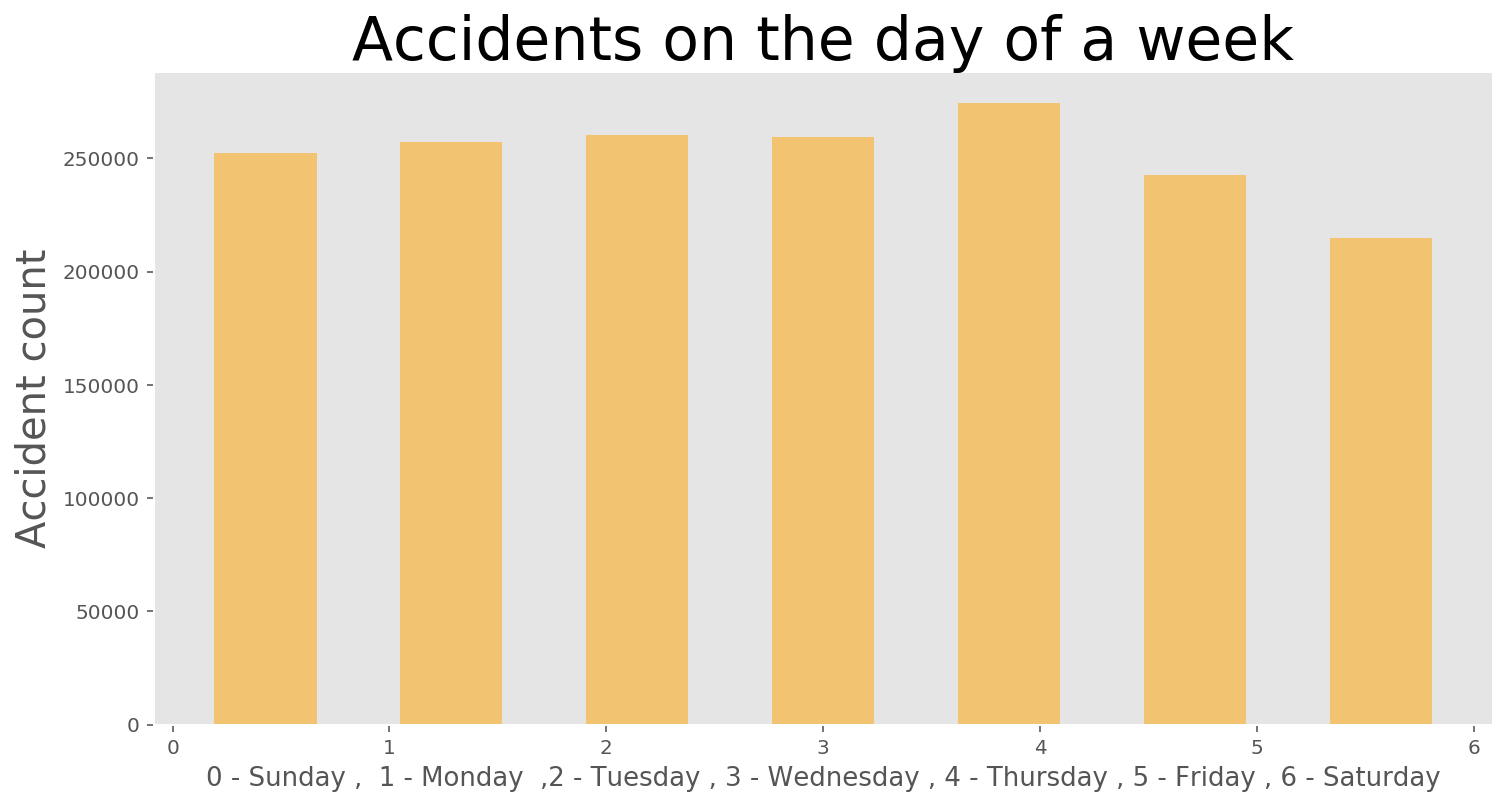

In [18]:
plt.figure(figsize=(12,6))
accident.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0, 0.5, 'Accident count')

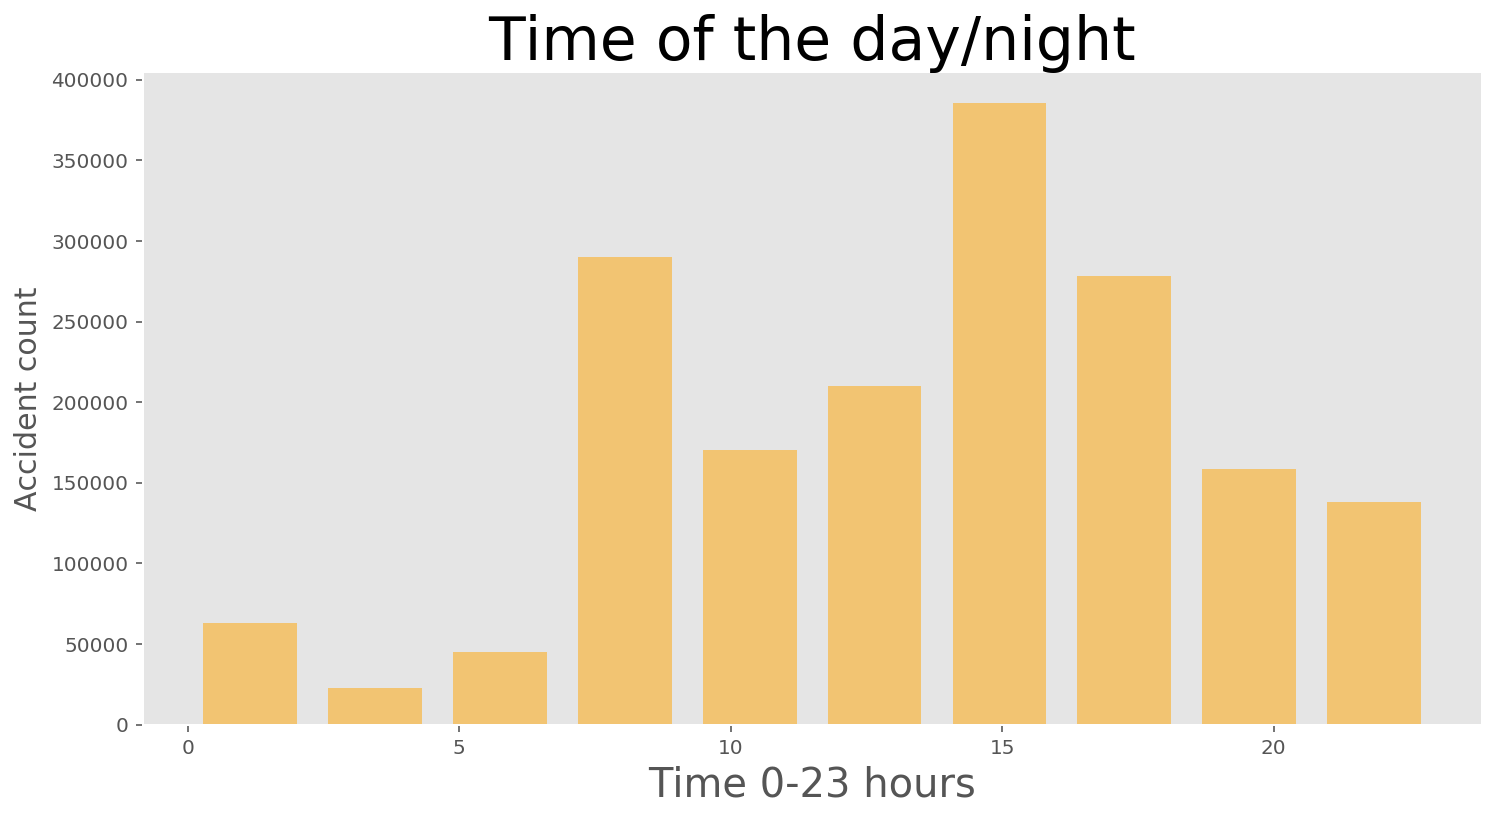

In [19]:
plt.figure(figsize=(12,6))
accident.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.

## Age band of casualities

In this dataset, age band is grouped in 11 different codes. We will create the labels and pass it to the plot as xticks so we can have idea about the bins representation.

Text(0.5, 0, 'Age of Casualties')

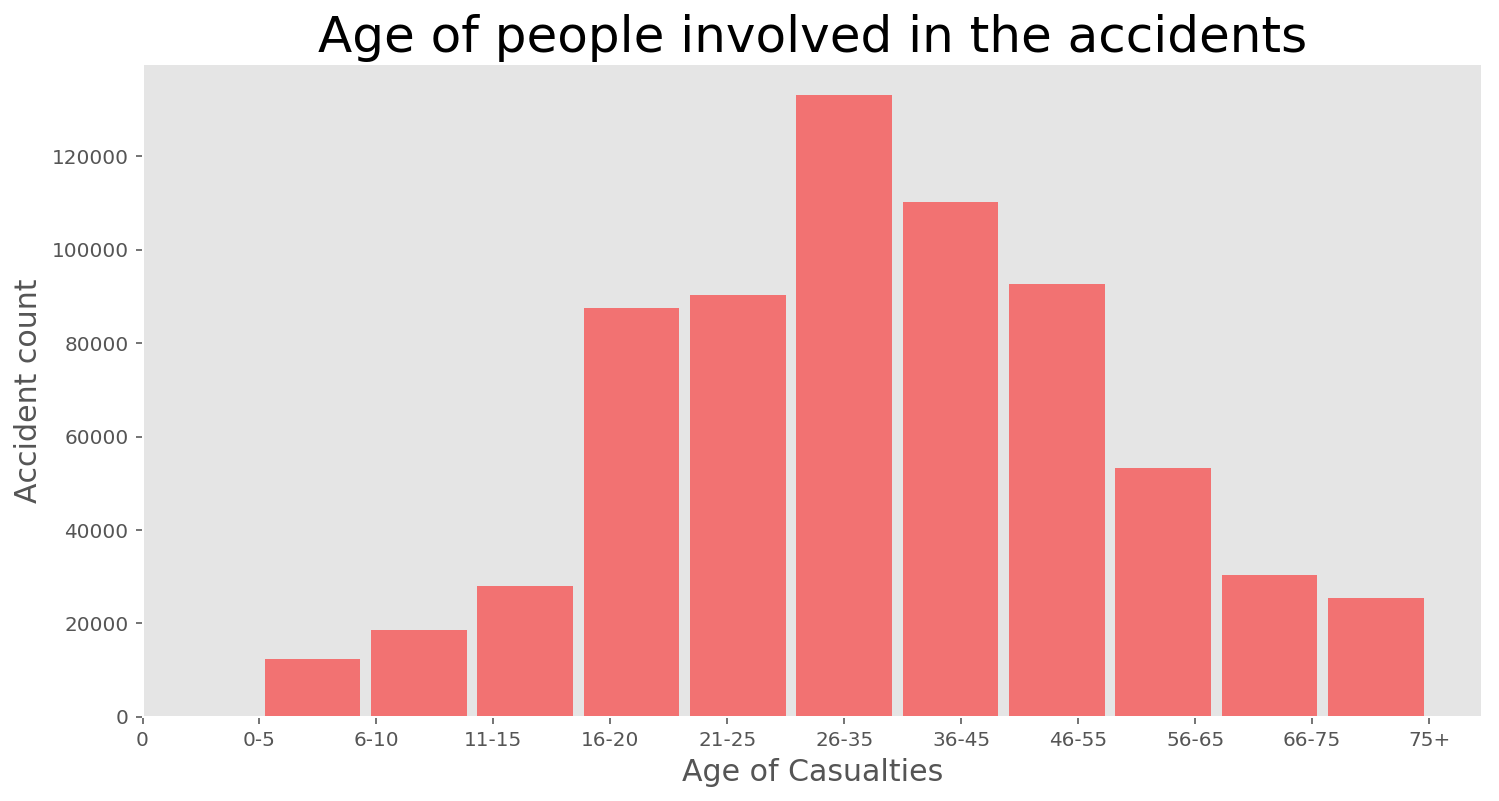

In [20]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Casualties', fontsize = 15,)

This is very interesting fact about this dataset. Most of the drivers age is around 25 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age.

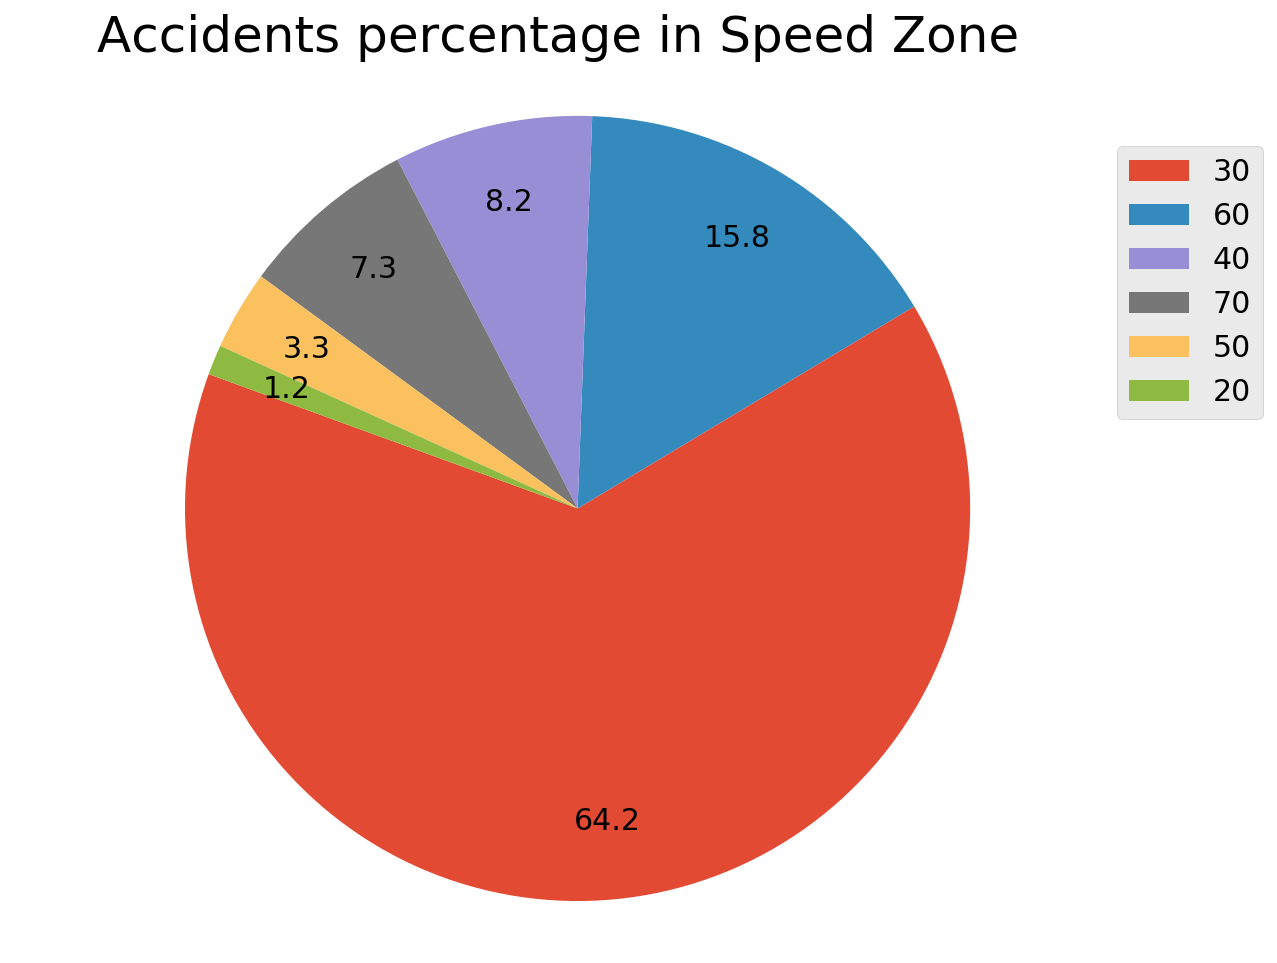

In [21]:
speed_zone_accidents = accident.loc[accident['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

Most of the accidents occured on the road where the speed limit is 30. I was expecting more accidents on highway or major roadways. Some of the accidents could be cause of stop sign, changing lanes or turning into parking lot etc.

## Co-relation between variables
Since our dataset is in numeric values. We can findout correlation between columns.

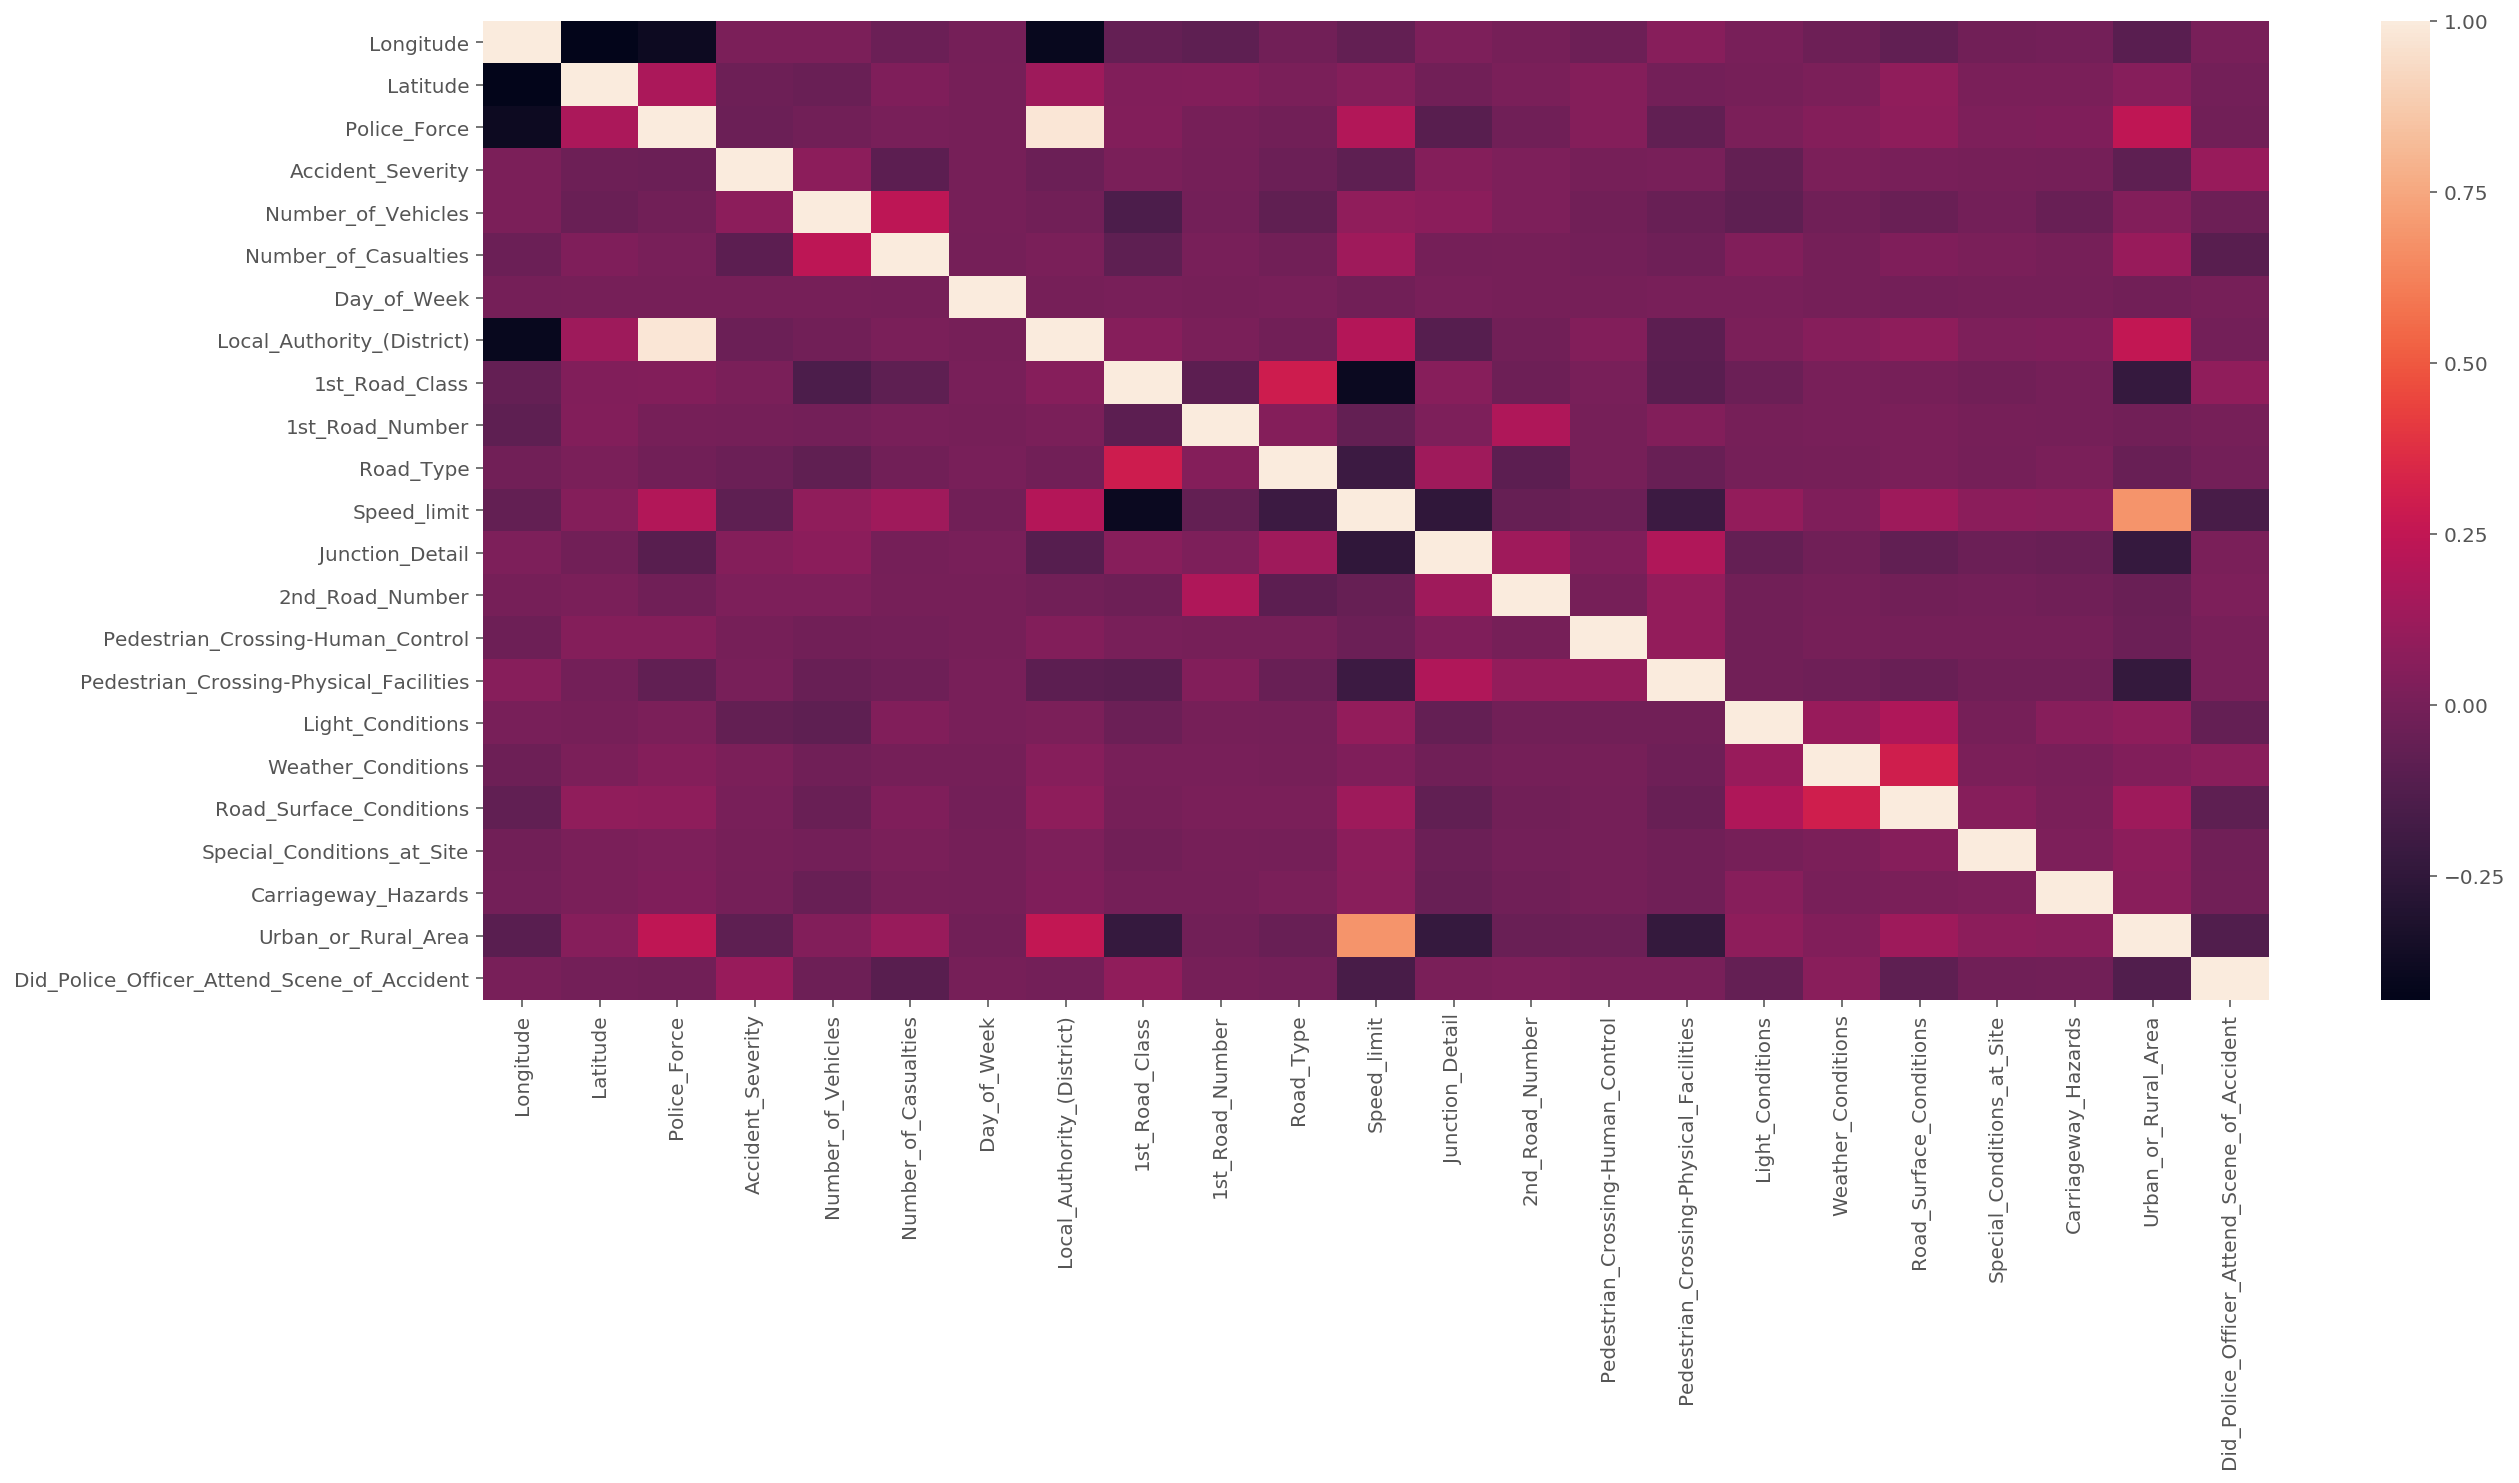

In [22]:
corr =  accident.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable.

1. There is only one postiive strong correlation between speed limit and Urban or Rural Area.

## Plotting accidents Location on Google Maps
Now we will be using google maps to plot the accidents. Using longitude and latitude information, we can see what area has the most accidents. However, it actually depends on how much traffic the area has. We can also get the idea of busiest area even if we do not want to look at just accidents. The accident plots acan give us really good idea about traffic in any area of the UK.



In [9]:
accident.shape

(1760539, 25)

In [8]:
# UK latitude and longitude values

latitude = 51.509865
longitude = -0.118092

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [10]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100

accident = accident.iloc[0:limit, :]
# create map and display it                                                                   
uk_map = folium.Map(location=[latitude, longitude], zoom_start=12,tiles = 'Stamen terrain')

# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(accident.Latitude, accident.Longitude):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add accidents to map
uk_map.add_child(accidents)

In [63]:

accident.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Date_time'],
      dtype='object')

## Machine Learning
We will be looking at different columns to figure out predicting about the accidents severity. After we can predict the accident severity, we can make some recommendation to law enforcement for looking into this and be prepared for the future. We can also have more emergency medical services available for those situations.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier

### Spliting the data into training data and test data
We will also consider few features as predictors for machine learning algorithm.

In [25]:
accident_ml = accident.drop(['Accident_Severity','Longitude','Latitude','1st_Road_Class','1st_Road_Number','Date_time','Local_Authority_(Highway)'] ,axis=1)

X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accident['Accident_Severity'].values,test_size=0.20, random_state=99)

## Logistic Regression


In [26]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.96
              precision    recall  f1-score   support

           1   0.217391  0.001100  0.002188      4547
           2   0.348315  0.000641  0.001279     48395
           3   0.849757  0.999816  0.918699    299166

   micro avg   0.849589  0.849589  0.849589    352108
   macro avg   0.471821  0.333852  0.307389    352108
weighted avg   0.772671  0.849589  0.780770    352108



Predicted,1,2,3,All
Actual,,,,
1,5,10,4532,4547
2,11,31,48353,48395
3,7,48,299111,299166
All,23,89,351996,352108


### Decision Tree


In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 75.73
              precision    recall  f1-score   support

           1   0.049082  0.054102  0.051470      4547
           2   0.184749  0.182374  0.183554     48395
           3   0.860492  0.860943  0.860718    299166

   micro avg   0.757259  0.757259  0.757259    352108
   macro avg   0.364774  0.365806  0.365247    352108
weighted avg   0.757137  0.757259  0.757195    352108



Predicted,1,2,3,All
Actual,,,,
1,246,1037,3264,4547
2,1075,8826,38494,48395
3,3691,37910,257565,299166
All,5012,47773,299323,352108


## Conclusion
As we have implemented the Logistic Regression, Decision Tree and K Nearest Neighbor algorithms to predict the accident severity. There are two things that we can conclude from this learning.

### Machine Learning Conclusion
As we have tried two different algorithms to predict the accident severity. It was clear that Decision tree performed much better in terms of predicting all the classes of accident severity. Logistic regression has better accuracy but it does not mean it did better than other algorithm. 

### Recommendation for Public or Law Enforcement
There are few things that were clear from this project. First, the most of the accidents occured in a area where peed limit is 30. Secondly, most of the casualties are in age band of 25 to 35 years. We already know that the car insurances are expensive for the young age people and this is one of the reasons. We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.